# 变量构建

## 变量构建

- 气候风险数据：全球碳排放交易市场数据、碳价指数、气候政策事件等。
- 地缘政治风险数据：地缘政治风险指数（GPR）、重大地缘政治事件（如战争、制裁、能源供应中断等）。
- 市场数据：绿色债券指数、可再生能源股票、传统能源期货市场价格、波动率指数（VIX）等。

核心变量：气候风险、地缘政治风险、绿色市场波动性、传统能源市场波动性。
控制变量：经济政策不确定性（EPU）、宏观经济指标（如GDP、通胀率）、油价波动。

In [2]:
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 
import pandas as pd

In [3]:
df = pd.read_csv('datasets/能源+绿色数据.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df.index.name = '日期'
df=df.drop('中国:碳市场碳排放配额(CEA):最新价', axis=1)
df=df.drop('中国:碳市场碳排放配额(CEA):成交量', axis=1)
df=df.drop('期货结算价(连续):焦煤', axis=1)
df.head()

,中债-中国绿色债券指数,期货结算价(连续):INE原油,中国液化天然气出厂价格指数,期货结算价(连续):焦炭
日期,,,,
2010-01-04,100.0058,NaN,NaN,NaN
2010-01-05,100.0212,NaN,NaN,NaN
2010-01-06,100.0451,NaN,NaN,NaN
2010-01-07,100.0387,NaN,NaN,NaN
2010-01-08,100.0159,NaN,NaN,NaN


In [4]:
name = {'中债-中国绿色债券指数': '绿色债券指数',
        "期货结算价(连续):INE原油":"INE原油",
        "中国液化天然气出厂价格指数":"天然气价格",
        "期货结算价(连续):焦炭":"焦炭价格",
        "期货结算价(连续):焦煤":"焦煤价格"}
df.columns = [name[i] for i in df.columns]
df = df.ffill()#.dropna()
#processed_df = processed_df/processed_df.iloc[0]
df.index[0]

Timestamp('2010-01-04 00:00:00')

In [5]:
# ### VIX
# VIX = pd.read_csv("datasets/CBOE China Etf VIX.csv", index_col=0)
# VIX.index = pd.to_datetime(VIX.index)
# VIX = VIX.sort_index()
# VIX = VIX['Price']
# VIX.name = 'VIX'
# print(VIX.index[0], VIX.index[-1])

### 沿海电煤指数

In [7]:
E_index = pd.read_excel("datasets/沿海电煤指数.xlsx", index_col=0)
E_index.index = pd.to_datetime(E_index.index)
E_index.columns = ['综合价5500']
print(E_index.index[0])

,综合价5500,综合价5000,成交价5500,成交价5000,离岸价5500,离岸价5000
日期,,,,,,
2025-01-10,723,646,770,671,722,647
2025-01-03,722,648,766,668,722,650
2024-12-27,725,650,769,669,728,652
2024-12-20,731,656,792,692,731,656
2024-12-13,738,662,814,711,739,663
...,...,...,...,...,...,...
2017-12-15,610,0,691,619,611,550
2017-12-08,609,0,689,616,609,547
2017-12-01,606,0,680,594,606,533


### 炭价

In [5]:
SHEA = pd.read_csv("datasets/上海碳排放权配额(SHEA)_成交均价.csv", index_col=0)
SHEA.index = pd.to_datetime(SHEA.index)
SHEA.columns = ['碳价']
print(SHEA.index[0])

2013-12-03 00:00:00


### GPR

In [6]:
GPR = pd.read_excel("datasets/data_gpr_export.xls", index_col=0)
GPR.index = pd.to_datetime(GPR.index)
GPR = GPR['GPRC_CHN']
GPR.name = '地缘政治'
print(GPR.index[0], GPR.index[-1])

1900-01-01 00:00:00 2024-08-01 00:00:00


### CCPU

In [7]:
CCPU = pd.read_excel("datasets/China's CPU index.xlsx", index_col=0)
CCPU.index = pd.to_datetime(CCPU.index)
CCPU.columns = ['气候政策']
print(CCPU.index[0])

2000-01-01 00:00:00


### CPU

In [8]:
CPU = pd.read_csv("datasets/CPU index.csv", index_col=0)
CPU.index = pd.to_datetime(['%s-%s' %(int(i.split('-')[0])+2000, i.split('-')[1]) for i in CPU.index])
print(CPU.index[0])

2001-01-01 00:00:00


/var/folders/sv/xyzb31jx2zz1ns_qr3d7hy700000gn/T/ipykernel_55822/787545835.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  CPU.index = pd.to_datetime(['%s-%s' %(int(i.split('-')[0])+2000, i.split('-')[1]) for i in CPU.index])


### 新能源指数 399808

In [9]:
new_energy = pd.read_csv("datasets/399808.csv", index_col=0)
new_energy.index = pd.to_datetime(new_energy.index)
new_energy.columns = ['新能源指数']
print(new_energy.index[-1])

2024-09-30 00:00:00


In [10]:
final_df = pd.concat([GPR,
                      CCPU,
                      new_energy,
                      df,
                      SHEA
                      #CPU['cpu_index']]
                      ], axis=1)
                    # ,
#final_df = final_df.drop(['焦炭价格'], axis=1)               
#final_df.columns = ['地缘政治风险指数', '气候政策不确定性指数', '绿色市场指数','传统能源指数']#, '气候风险指数2']

In [11]:
final_df = final_df.ffill()  # 日度开关
final_df = final_df.dropna()
final_df = final_df.loc[:CCPU.index[-1]]
final_df.index = pd.to_datetime(final_df.index)
final_df = final_df[['地缘政治', '气候政策', '新能源指数', '绿色债券指数', '碳价', 'INE原油', '天然气价格', '焦炭价格']]

### 重命名英文

In [12]:
CN_EN = {'地缘政治':"Geopolitics", '气候政策':"Climate Policy",
 '新能源指数':"New Energy",
 '绿色债券指数':"Green Bond",
 '碳价':"Carbon Price", 'INE原油':"Crude Oil",
 '天然气价格':"Natural Gas", '焦炭价格':"Coke"}
final_df.columns=[CN_EN[i] for i in final_df.columns]

去掉周六周日

In [13]:
final_df = final_df.loc[new_energy.loc['2018-03-26':'2023-12-31'].index]

<Axes: xlabel='DateTime'>

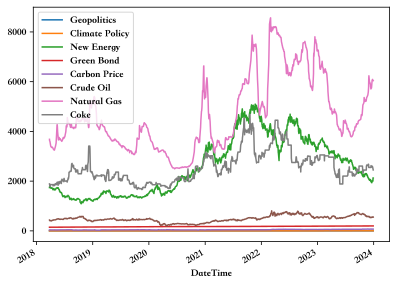

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Songti SC'  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示异常
final_df.plot()

In [15]:
final_df.to_csv('datasets/final_df.csv')

## 所有数据预览

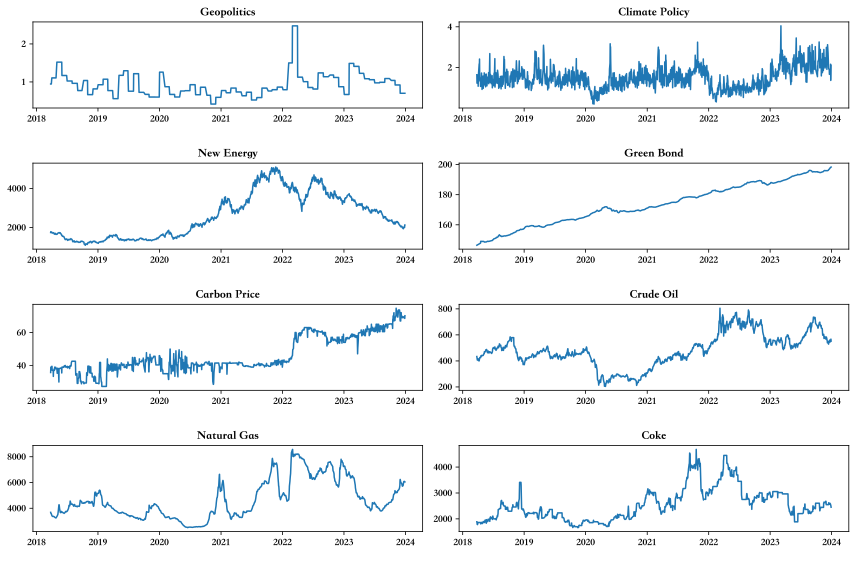

In [16]:
import matplotlib.pyplot as plt
# 创建子图
num_columns = len(final_df.columns)
fig, axes = plt.subplots(4, 2, figsize=(12, 1. * num_columns))
axes = axes.ravel()
# 绘制每一列的折线图
for ax, column in zip(axes, final_df.columns):
    ax.plot(final_df.index, final_df[column], label=column)
    ax.set_title(f'{column}')
    ax.set_xlabel(' ')
    ax.set_ylabel('')
    #ax.grid()
    #ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig('images/price_index.svg')
plt.show()

## 对数处理

In [17]:
import numpy as np
log_final_df = pd.concat([final_df.iloc[:,:2], 
                            final_df.iloc[:, 2:].apply(np.log).diff()],
                          axis=1).dropna()

In [18]:
# import numpy as np
# log_final_df = final_df.apply(np.log).diff().dropna()

In [19]:
final_df.shape, log_final_df.shape

((1403, 8), (1402, 8))

In [20]:
log_final_df.to_csv('datasets/log_final_df.csv')

<Axes: xlabel='DateTime'>

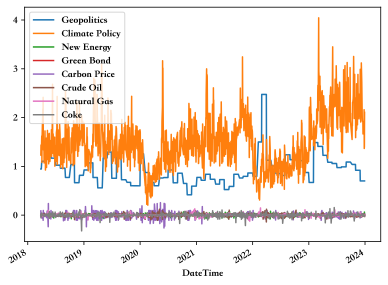

In [21]:
log_final_df.plot()

## GARCH(1,1)

In [22]:
from arch import arch_model  # 用于波动率建模（如GARCH模型）
def estimate_garch_volatility(returns_series):
    """
    对每个收益率序列使用GARCH(1,1)模型进行拟合，估计波动率
    """
    model = arch_model(returns_series, vol='Garch', p=1, q=1)
    model_fit = model.fit(disp='off')
    volatility = model_fit.conditional_volatility
    return volatility

In [23]:
volatility_df = pd.DataFrame(index=log_final_df.index)
for col in log_final_df.columns:
    print(col)
    volatility_df[col] = estimate_garch_volatility(log_final_df[col])

Geopolitics
Climate Policy
New Energy
Green Bond
Carbon Price
Crude Oil
Natural Gas
Coke


/Users/xhc/miniconda3/envs/d2l/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000381. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/xhc/miniconda3/envs/d2l/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.982e-07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/xhc/miniconda3/envs/d2l/lib/python3

<Axes: xlabel='DateTime'>

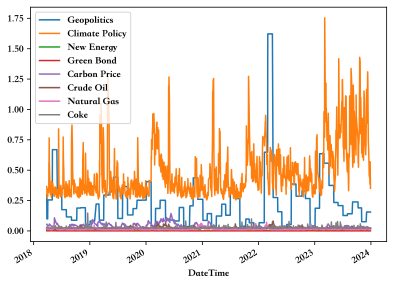

In [24]:
volatility_df.plot()

In [25]:
volatility_df.to_csv('datasets/garch_volatility_df.csv')

## 相关性

### 价格相关性

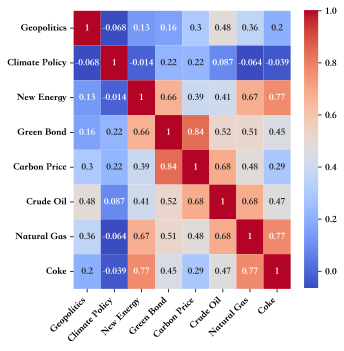

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = final_df.corr()
plt.figure(figsize=(5,5))  
sns.heatmap(corr_df, annot=True, cmap='coolwarm')  # Use annot=True to display the values in the cells
plt.xticks(rotation=45, ha='right') 
#plt.yticks(fontsize=8) 
#plt.tick_params(bottom=False, left=False)
# 显示热力图
#plt.tight_layout()
plt.tight_layout()
plt.savefig('images/price_corr.svg')
plt.show()



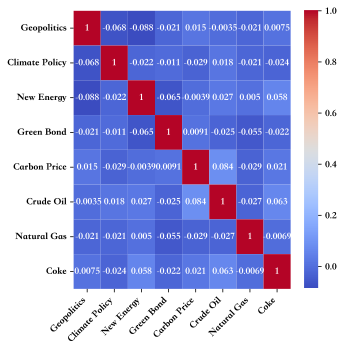

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = log_final_df.corr()
plt.figure(figsize=(5,5))  
sns.heatmap(corr_df, annot=True, cmap='coolwarm')  # Use annot=True to display the values in the cells
plt.xticks(rotation=45, ha='right') 
#plt.yticks(fontsize=8) 
#plt.tick_params(bottom=False, left=False)
# 显示热力图
#plt.tight_layout()
plt.tight_layout()
plt.savefig('images/log_ret_corr.svg')
plt.show()



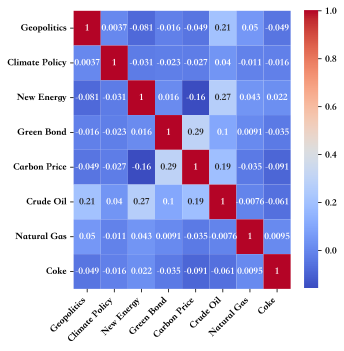

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = volatility_df.corr()
plt.figure(figsize=(5,5))  
sns.heatmap(corr_df, annot=True, cmap='coolwarm')  # Use annot=True to display the values in the cells
plt.xticks(rotation=45, ha='right') 
#plt.yticks(fontsize=8) 
#plt.tick_params(bottom=False, left=False)
# 显示热力图
#plt.tight_layout()
plt.tight_layout()
plt.savefig('images/volatility_corr.svg')
plt.show()

